In [1]:
import math
import numpy as np
import pandas as pd
import glob

from sklearn import linear_model, model_selection, metrics

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

plt.style.use('seaborn')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Gradient decent

In [2]:
# f(x) = log(x) * log(x)

def fn(x):
  # return math.pow((math.log(x)), 2)
  return x*x + 4*x + 9

def derivative_fn(x):
  # return 2.0 * math.log(x) / x
  return 2*x + 4

x = 2 # initial value
learning_rate = 10

print ("Starting at", "x:", x, "log(x)^2:", fn(x))

for step in range(20):
  x = x - learning_rate * derivative_fn(x) 
  print("step", step + 1, "x:", x, "log(x)^2:", fn(x))

Starting at x: 2 log(x)^2: 21
step 1 x: -78 log(x)^2: 5781
step 2 x: 1442 log(x)^2: 2085141
step 3 x: -27438 log(x)^2: 752734101
step 4 x: 521282 log(x)^2: 271737008661
step 5 x: -9904398 log(x)^2: 98097060124821
step 6 x: 188183522 log(x)^2: 35413038705058581
step 7 x: -3575486958 log(x)^2: 12784106972526145941
step 8 x: 67934252162 log(x)^2: 4615062617081938682901
step 9 x: -1290750791118 log(x)^2: 1666037604766579864525461
step 10 x: 24524265031202 log(x)^2: 601439575320735331093689621
step 11 x: -465961035592878 log(x)^2: 217119686690785454524821951381
step 12 x: 8853259676264642 log(x)^2: 78380206895373549083460724446741
step 13 x: -168211933849028238 log(x)^2: 28295254689229851219129321525271701
step 14 x: 3196026743131536482 log(x)^2: 10214586942811976290105685070623082261
step 15 x: -60724508119499193198 log(x)^2: 3687465886355123440728152310494932694421
step 16 x: 1153765654270484670722 log(x)^2: 1331175184974199562102862984088670702684181
step 17 x: -21921547431139208743758 l

## Gradient decent to solve Linear Regression

In [3]:
# Dimension of input data
n_data, n_feature = 1000, 20

# Randomly initialized data, stacked with bias
X = np.hstack((np.random.rand(n_data, n_feature), 
               np.ones((n_data, 1), dtype=float)))

# Choose the weights to be [1, 2, 3, ... , 21]
w = np.array(range(1, n_feature + 2), dtype=float)
y = np.dot(X, w) # + np.random.normal(0, 100)

Given $\mathbf{X}$ and $\mathbf{y}$, objective: compute $\mathbf{w}$

In [4]:
def loss(w, X, y):
  # squared loss
  return np.sum(np.square(np.dot(X, w) - y)) / (X.shape[0] * 2)

def gradient(w, X, y, j):
  return np.dot(np.dot(X, w) - y, X[:,j]) / X.shape[0]

def gradient_decent(w, X, y, learning_rate, steps):
  losses = []
  for i in range(steps):
    # for each step
    for j in range(w.shape[0]):
      # update each weight 
      w[j] = w[j] - learning_rate * gradient(w, X, y, j)
    current_loss = loss(w, X, y)
    if i % 100 == 0:
      print ("step: {}, Loss: {}".format(i + 1, current_loss))
    losses.append(np.log(current_loss))
  print ("step: {}, Loss: {}".format(steps + 1, loss(w, X, y)))
  return w, losses

In [5]:
# Initialize some random weights
w_init = np.random.normal(0, 1, w.shape[0])
w_init

array([-1.36206612e+00, -1.92304896e+00, -1.05705841e-01,  1.37302987e+00,
       -4.07050334e-01, -1.15131396e+00, -6.07148989e-02, -1.51270933e-01,
       -3.30336430e-01,  4.54509479e-01,  1.22426362e+00, -1.09751416e+00,
       -2.74607665e-01, -1.31310521e+00,  3.28174008e-01, -2.97644780e-01,
        2.16126325e-01,  8.59581803e-02,  6.84962877e-01, -6.11939706e-01,
       -7.03289084e-04])

In [6]:
w_current_init = np.copy(w_init)
w_learned, _ = gradient_decent(w_current_init, X, y, 1, 1000)

step: 1, Loss: 445.2653916721183
step: 101, Loss: 2.042673006552521
step: 201, Loss: 0.0012414322116895047
step: 301, Loss: 9.56256314406529e-07
step: 401, Loss: 6.975164150644552e-10
step: 501, Loss: 5.154599258160942e-13
step: 601, Loss: 3.7987580741691183e-16
step: 701, Loss: 2.801032087451039e-19
step: 801, Loss: 2.0652464558993228e-22
step: 901, Loss: 1.5465238131445983e-25
step: 1001, Loss: 3.7108016981596394e-28


In [7]:
w_learned

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21.])

In [8]:
# Study the learning curve of small, medium, large weights
learning_curves = {}
learning_rates = [5, 1, 0.1]
for learning_rate in learning_rates:
  w_current_init = np.copy(w_init)
  print ('\n\nlearning rate: {}'.format(learning_rate))
  w_learned, losses = gradient_decent(w_current_init, X, y, learning_rate, 1000)
  learning_curves[str(learning_rate)] = losses



learning rate: 5
step: 1, Loss: 5252.210751106294
step: 101, Loss: 64844.75127205133
step: 201, Loss: 17049504.705547847
step: 301, Loss: 3352302917.6717267
step: 401, Loss: 381262808133.56476
step: 501, Loss: 30827264309531.855
step: 601, Loss: 5950698140975313.0
step: 701, Loss: 1.4739277972819692e+18
step: 801, Loss: 2.1166693595080222e+20
step: 901, Loss: 1.7932603740548829e+22
step: 1001, Loss: 2.144279956897847e+24


learning rate: 1
step: 1, Loss: 445.2653916721183
step: 101, Loss: 2.042673006552521
step: 201, Loss: 0.0012414322116895047
step: 301, Loss: 9.56256314406529e-07
step: 401, Loss: 6.975164150644552e-10
step: 501, Loss: 5.154599258160942e-13
step: 601, Loss: 3.7987580741691183e-16
step: 701, Loss: 2.801032087451039e-19
step: 801, Loss: 2.0652464558993228e-22
step: 901, Loss: 1.5465238131445983e-25
step: 1001, Loss: 3.7108016981596394e-28


learning rate: 0.1
step: 1, Loss: 2431.77307471517
step: 101, Loss: 7.659766406800797
step: 201, Loss: 1.3771155204005505
step: 3

In [9]:

df_losses = pd.DataFrame(learning_curves).reset_index()
df_losses.columns = ['index'] + ['lr=' + str(x) for x in learning_rates]

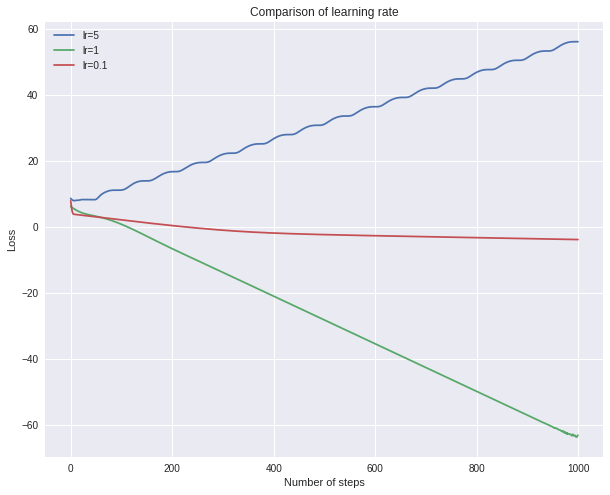

In [10]:
plt.figure(figsize=(10, 8))
for lr in learning_rates:
  plt.plot('index', 'lr={}'.format(lr), data=df_losses)
plt.title('Comparison of learning rate')
plt.xlabel('Number of steps')
plt.ylabel('Loss')
plt.legend()

## Closed form solution (Analytical solution)
Let $\mathbf{X} \in R ^{n \times d}$ be the feature matrix, $\mathbf{w}$ be the $d$ dimensional weight vector and $\mathbf{y}$ be the $n$ dimensional label vector. We can compute the optimal weight vector $\mathbf{w}^*$ as follows.

Let the cost function $J(\mathbf{w})=||\mathbf{Xw}-\mathbf{y}||_2^2 = \mathbf{w}^T(\mathbf{X}^T\mathbf{X})\mathbf{w}-2\mathbf{y}^T\mathbf{Xw} + ||\mathbf{y}||_2^2$

Note: $\displaystyle \frac{\partial (\mathbf{AX})}{\partial \mathbf{X}}=\mathbf{A}^T$ and $\displaystyle \frac{\partial (\mathbf{X}^T\mathbf{AX})}{\partial \mathbf{X}} = \mathbf{AX}+\mathbf{A}^T\mathbf{X}$

Therefore, $\displaystyle \frac{\partial}{\partial \mathbf{w}}J(\mathbf{w}) = 2\mathbf{X}^T\mathbf{Xw} - 2\mathbf{X}^T\mathbf{y}$

Setting $\displaystyle \frac{\partial}{\partial \mathbf{w}}J(\mathbf{w} = 0)$, we have: $\mathbf{X}^T\mathbf{Xw^*} = \mathbf{X}^T\mathbf{y} \Rightarrow \mathbf{w}^* = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$

In [11]:
# closed form solution
W_learned = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X), X)), np.transpose(X)), y)

In [12]:
W_learned

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21.])

## Logistic Regression

In [13]:
# Get the dataset
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [14]:
data = np.loadtxt('gdrive/My Drive/BT4012/Week 4/exam_score.csv', delimiter = ',')

In [15]:
X = data[:, :2]
y = data[:, 2].astype(int)

In [16]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.8, random_state=4012)

In [17]:
# Fit a logistic regression model with the training set

estimator = linear_model.LogisticRegression(solver = 'lbfgs')
estimator.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
# Perform prediction on the test set using trained logistic regression model

y_pred = estimator.predict(X_test)
print('accuracy:', metrics.accuracy_score(y_test, y_pred))

accuracy: 0.9


### Visualize the model

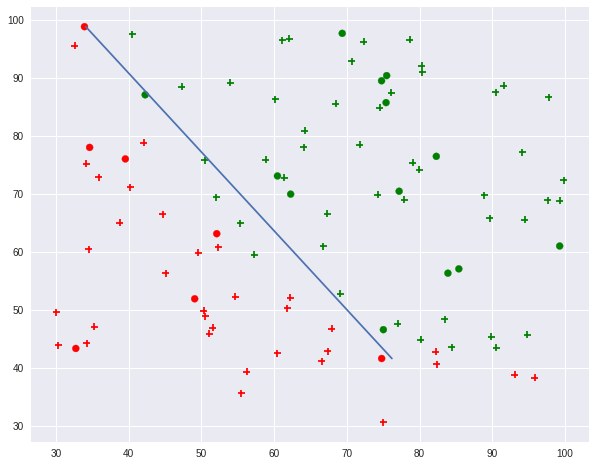

In [19]:
color = ['red', 'green']
y_train_color, y_test_color = [color[i] for i in y_train], [color[i] for i in y_test]

plt.figure(figsize = (10, 8))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train_color, marker='o')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test_color, marker='+')

# plt.plot((f(x1), f(x2)), (x1, x2))
# w1*x1 + w2*x2 + b = 0 => x1 = (-w2*x2 - b)/w1
plt.plot((- estimator.coef_[0][1] * np.array((min(X_train[:,1]), max(X_train[:,1]))) - estimator.intercept_[0]) / estimator.coef_[0][0], np.array((min(X_train[:,1]), max(X_train[:,1]))))

### Logistic Regression with different model complexity trade-off hyper-parameters

accuracy for test data at C=0.000200 is 0.650000
model complexity: 0.021168887033658774
accuracy for test data at C=0.100000 is 0.900000
model complexity: 0.35414503570499356


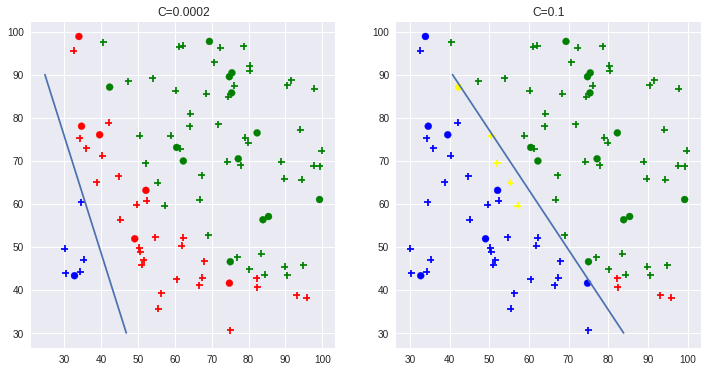

In [20]:
plt.figure(figsize = (12,6))

"""
C : float, default=1.0
    Inverse of regularization strength; must be a positive float.
    Like in support vector machines, smaller values specify stronger
    regularization.
"""
C = [0.0002, 0.1]
for i in range(2):
    plt.subplot(1, 2, i+1)
    clf = linear_model.LogisticRegression(C=C[i])
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    # color[0][0] and color[1][1] indicate correct predictions
    # color[0][1] and color[1][0] indicate wrong predictions
    color = [['blue', 'red'], ['yellow', 'green']]
    print('accuracy for test data at C=%f is %f' % (C[i], metrics.accuracy_score(y_test, y_test_pred)))
    print('model complexity:', np.sqrt(np.square(clf.coef_[0][0]) + np.square(clf.coef_[0][1])))

    plt.scatter(X_train[:,0], X_train[:,1], c=[color[j1][j2] for j1, j2 in zip(y_train, y_train_pred)], marker='o')
    plt.scatter(X_test[:,0], X_test[:,1], c=[color[j1][j2] for j1, j2 in zip(y_test, y_test_pred)], marker='+')
    plt.plot((- clf.coef_[0][1] * np.array((30,90)) - clf.intercept_[0]) / clf.coef_[0][0], np.array((30,90)))
    plt.title(f"C={C[i]}")
plt.show()

### Evaluation of Classification Models


In [21]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.5, random_state=4102)

estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)

count_tp, count_tn, count_fp, count_fn = 0, 0, 0, 0
for i in range(len(y_test)):
    if y_test[i] == 1:
        if y_pred[i] == 1:
            count_tp += 1
        else:
            count_fn += 1
    else:
        if y_pred[i] == 1:
            count_fp += 1
        else:
            count_tn += 1
print(count_tp, '\t', count_fn)
print(count_fp, '\t', count_tn)
print('Accuracy:', (count_tp + count_tn) / (count_tp + count_fp + count_tn + count_fn))
print('Precision:', count_tp / (count_tp + count_fp))
print('Recall:', count_tp / (count_tp + count_fn))

30 	 1
4 	 15
Accuracy: 0.9
Precision: 0.8823529411764706
Recall: 0.967741935483871


In [22]:
cf_matrix = metrics.confusion_matrix(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

report = """
The evaluation report is:
Confusion Matrix:
{}
Accuracy: {}
Precision: {}
Recall: {} 
""".format(cf_matrix, accuracy, precision, recall)
print(report)


The evaluation report is:
Confusion Matrix:
[[15  4]
 [ 1 30]]
Accuracy: 0.9
Precision: 0.8823529411764706
Recall: 0.967741935483871 



### Plot ROC curve and compute AUC

AUC: 0.9422750424448217


Text(0.5, 1.0, 'ROC Curve')

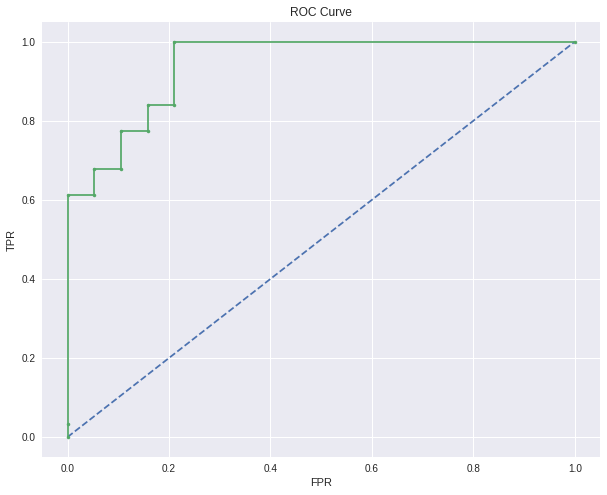

In [23]:
y_pred_prob = estimator.predict_proba(X_test)

# keep probabilities for the positive class only
y_pred_prob = y_pred_prob[:, 1]

# calculate the ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

# Calculate AUC
print('AUC:', metrics.roc_auc_score(y_test, y_pred_prob))

plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], ls = '--')
plt.plot(fpr, tpr, marker = '.')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')

## Using predictive analysis for anomaly/fraud detection
![](https://cdn-images-1.medium.com/max/800/1*64laQlCh-57A6AyTXAeRWQ.png)

### Load dataset

In [24]:
import h5py

# Hierarchical Data Format (HDF) is a set of file formats (HDF4, HDF5) designed to store and organize large amounts of data.
# HDF supports n-dimensional datasets and each element in the dataset may itself be a complex object.
# HDF is portable and is a self-describing file format, meaning everything all data and metadata can be passed along in one file.

def get_dataset(feature, label):
    """
    Create the actual dataset split into train and test, pictures content is as float32 and
    normalized (/255.). The dataset is loaded from h5 files.

    :return: X_train, X_test, y_train, y_test (numpy arrays)
    """
  
    h5f = h5py.File(feature,'r')
    X_train = h5f['X_train'][:]
    X_test = h5f['X_test'][:]
    h5f.close()    

    h5f = h5py.File(label,'r')
    y_train = h5f['y_train'][:]
    y_test = h5f['y_test'][:]
    h5f.close()    
        
    X_train = X_train.astype('float32') / 255.
    X_test = X_test.astype('float32') / 255.
    
    print("Train", X_train.shape, y_train.shape)
    print("Test", X_test.shape, y_test.shape)
   
    return X_train, X_test, y_train, y_test


In [25]:
feature_file = 'gdrive/My Drive/BT4012/Week 4/dataset.h5'
label_file = 'gdrive/My Drive/BT4012/Week 4/labels.h5'

X_train, X_test, y_train, y_test = get_dataset(feature=feature_file, label=label_file)

map_characters = {0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson', 
        3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel', 
        7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson', 
        11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak', 
        14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'}


Train (14317, 64, 64, 3) (14317, 18)
Test (2527, 64, 64, 3) (2527, 18)


### Train a convolutional neural network

In [26]:
import time

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

def create_model(input_shape, num_classes):
    """
    CNN Keras model with 6 convolutions.   
    return: Keras model
    """
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(256, (3, 3), padding='same')) 
    model.add(Activation('relu'))
    model.add(Conv2D(256, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [27]:
epochs = 20

model= create_model(X_train.shape[1:], len(map_characters))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test), shuffle=True)


Epoch 1/20
448/448 [==============================] - 17s 39ms/step - loss: 2.3076 - accuracy: 0.2736 - val_loss: 1.6479 - val_accuracy: 0.5010
Epoch 2/20
448/448 [==============================] - 17s 38ms/step - loss: 1.3683 - accuracy: 0.5809 - val_loss: 1.0229 - val_accuracy: 0.7091
Epoch 3/20
448/448 [==============================] - 17s 38ms/step - loss: 0.8504 - accuracy: 0.7446 - val_loss: 0.7398 - val_accuracy: 0.7990
Epoch 4/20
448/448 [==============================] - 17s 37ms/step - loss: 0.6090 - accuracy: 0.8132 - val_loss: 0.5204 - val_accuracy: 0.8429
Epoch 5/20
448/448 [==============================] - 16s 36ms/step - loss: 0.4194 - accuracy: 0.8702 - val_loss: 0.4841 - val_accuracy: 0.8651
Epoch 6/20
448/448 [==============================] - 16s 36ms/step - loss: 0.3346 - accuracy: 0.8959 - val_loss: 0.3973 - val_accuracy: 0.8967
Epoch 7/20
448/448 [==============================] - 16s 36ms/step - loss: 0.2526 - accuracy: 0.9221 - val_loss: 0.3792 - val_accuracy:

In [28]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 64)        1

In [29]:
y_pred = model.predict(X_test)

In [30]:
print(metrics.classification_report(np.argmax(y_test, axis=1), 
                            np.argmax(y_pred, axis=1), 
                            target_names=map_characters.values()))

                          precision    recall  f1-score   support

  abraham_grampa_simpson       0.90      0.95      0.92       135
  apu_nahasapeemapetilon       0.97      0.96      0.96        99
            bart_simpson       0.89      0.93      0.91       176
charles_montgomery_burns       0.84      0.92      0.88       159
            chief_wiggum       0.90      0.97      0.93       156
          comic_book_guy       0.94      0.83      0.88        70
          edna_krabappel       0.91      0.94      0.93        68
           homer_simpson       0.88      0.80      0.84       155
           kent_brockman       0.99      0.98      0.98        81
        krusty_the_clown       0.99      0.96      0.97       165
            lisa_simpson       0.93      0.93      0.93       184
           marge_simpson       0.98      0.98      0.98       202
     milhouse_van_houten       0.98      0.94      0.96       161
             moe_szyslak       0.87      0.90      0.89       169
         

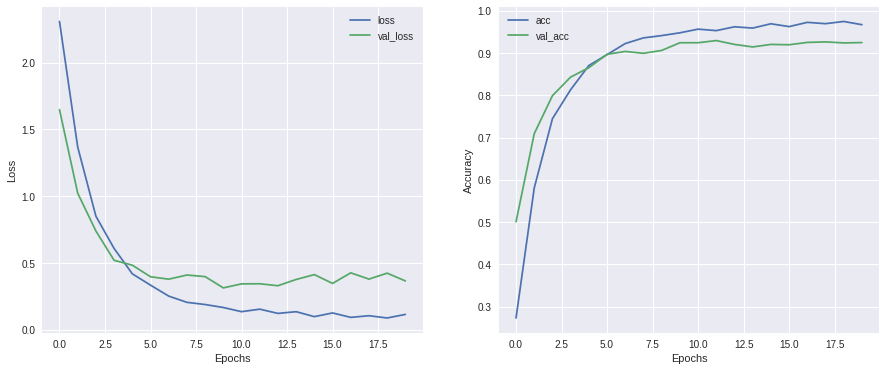

In [31]:
f, ax = plt.subplots(ncols=2, figsize=(15,6))
ax[0].plot(range(epochs), history.history['loss'], label='loss')
ax[0].plot(range(epochs), history.history['val_loss'], label='val_loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()
ax[1].plot(range(epochs), history.history['accuracy'], label='acc')
ax[1].plot(range(epochs), history.history['val_accuracy'], label='val_acc')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

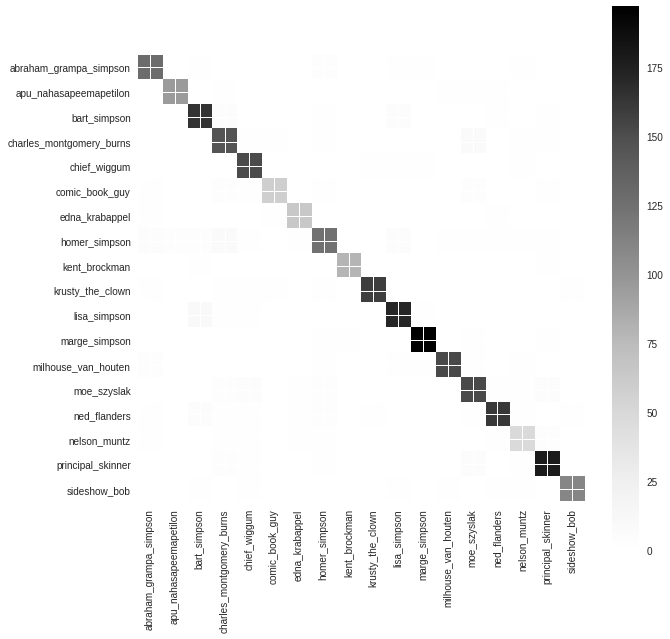

In [32]:
plt.figure(figsize=(10,10))
cnf_matrix =  metrics.confusion_matrix(np.where(y_test > 0)[1], np.argmax(y_pred, axis=1))
classes = list(map_characters.values())
plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

### Compute entropies of predictions on Simpsons dataset

In [33]:
from scipy.stats import entropy
my_entropy = lambda x: entropy(x, base=2)

predictions = model.predict(np.concatenate((X_train, X_test), axis=0))

In [34]:
entropies = np.apply_along_axis(my_entropy, 1, predictions)
df_entropies = pd.DataFrame({'entropies':entropies})

Text(0, 0.5, 'Count')

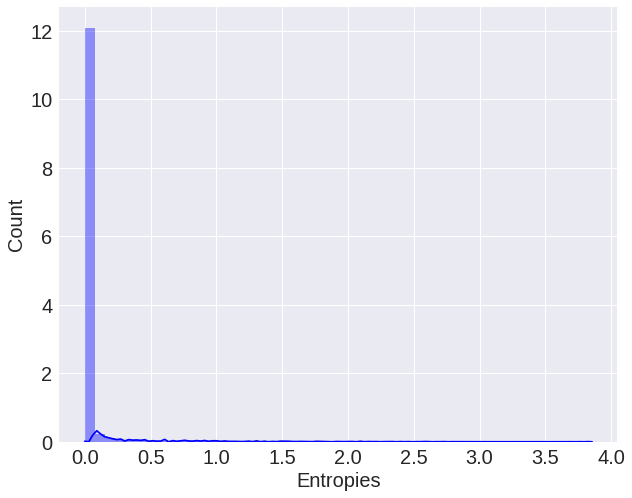

In [35]:
plt.figure(figsize=(10,8))
ax = sns.distplot(df_entropies.entropies, color='blue')
ax.tick_params(labelsize=20)
ax.set_xlabel("Entropies",fontsize=20)
ax.set_ylabel("Count",fontsize=20)

### Generate distribution on max score

[Text(0, 0, '0'),
 Text(0, 0, '0.1'),
 Text(0, 0, '0.2'),
 Text(0, 0, '0.3'),
 Text(0, 0, '0.4'),
 Text(0, 0, '0.5'),
 Text(0, 0, '0.6'),
 Text(0, 0, '0.7'),
 Text(0, 0, '0.8'),
 Text(0, 0, '0.9'),
 Text(0, 0, '1.0')]

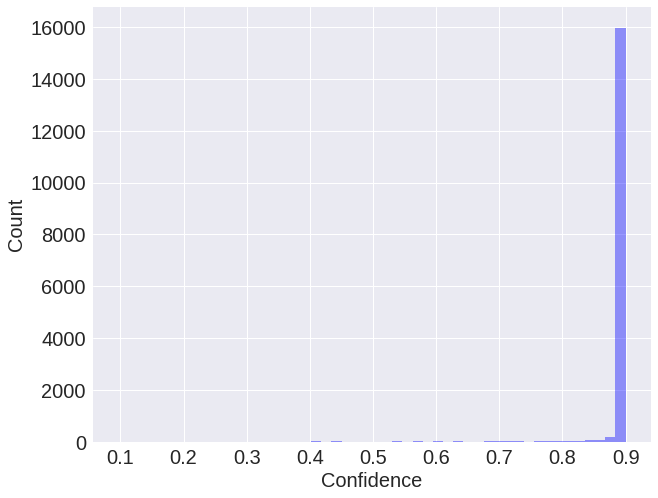

In [36]:
df_simpson_max_score = pd.DataFrame({'max_confidence': np.max(predictions, axis=1)})
plt.figure(figsize=(10,8))
ax = sns.distplot(df_simpson_max_score.max_confidence, color='blue', kde=False)
ax.set_xlabel("Confidence",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
ax.tick_params(labelsize=20)
ax.set_xticklabels([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

### Compute entropies of predictions on anomalies

In [37]:
import os
import cv2
import matplotlib.image as mpimg

def show_img(path):
    img=mpimg.imread(path)
    imgplot = plt.imshow(img)
    plt.show()

path = 'gdrive/My Drive/BT4012/Week 4/others/'
others_pics = []
pictures = [k for k in glob.glob(os.path.join(path, '*'))]

for pic in pictures:
    a = cv2.imread(pic)
    a = cv2.resize(a, (X_train.shape[1], X_train.shape[1]))
    others_pics.append(a)
    
other_pics = np.array(others_pics)
other_pics = other_pics.astype("float32")/255

others_preditions = model.predict(other_pics)

In [38]:
# Check the score distribution of a ramdonly picked normal sample

which = np.random.randint(X_train.shape[0])
print (which)
confidence_scores = model.predict(X_train[which:which+1,:])
df_conf_normal = pd.DataFrame({'class':list(map_characters.values()), 'confidence':confidence_scores.flatten()})
df_conf_normal['confidence'] = df_conf_normal['confidence'].apply(lambda x: round(x, 5))
df_conf_normal.sort_values(by='confidence', ascending=False)

8517


,class,confidence
6,edna_krabappel,1.0
0,abraham_grampa_simpson,0.0
10,lisa_simpson,0.0
16,principal_skinner,0.0
15,nelson_muntz,0.0
14,ned_flanders,0.0
13,moe_szyslak,0.0
12,milhouse_van_houten,0.0
11,marge_simpson,0.0
9,krusty_the_clown,0.0


In [39]:
# Check the score distribution of a ramdonly picked anomaly sample

which = np.random.randint(len(other_pics))
print (which)
confidence_score = model.predict(other_pics[which:which+1,:])

df_conf_anomaly = pd.DataFrame({'class':list(map_characters.values()), 'confidence':confidence_score.flatten()})
df_conf_anomaly['confidence'] = df_conf_anomaly['confidence'].apply(lambda x: round(x, 5))
df_conf_anomaly.sort_values(by='confidence', ascending=False)

8


,class,confidence
4,chief_wiggum,0.36904
3,charles_montgomery_burns,0.22695
14,ned_flanders,0.11651
16,principal_skinner,0.07114
5,comic_book_guy,0.06935
12,milhouse_van_houten,0.04371
17,sideshow_bob,0.03310
11,marge_simpson,0.02126
10,lisa_simpson,0.01196
2,bart_simpson,0.01017


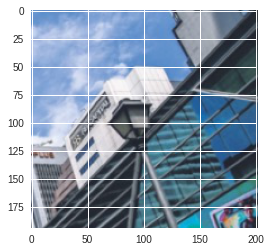

In [40]:
show_img(pictures[which])

### Generate distributions of scores of anomalies

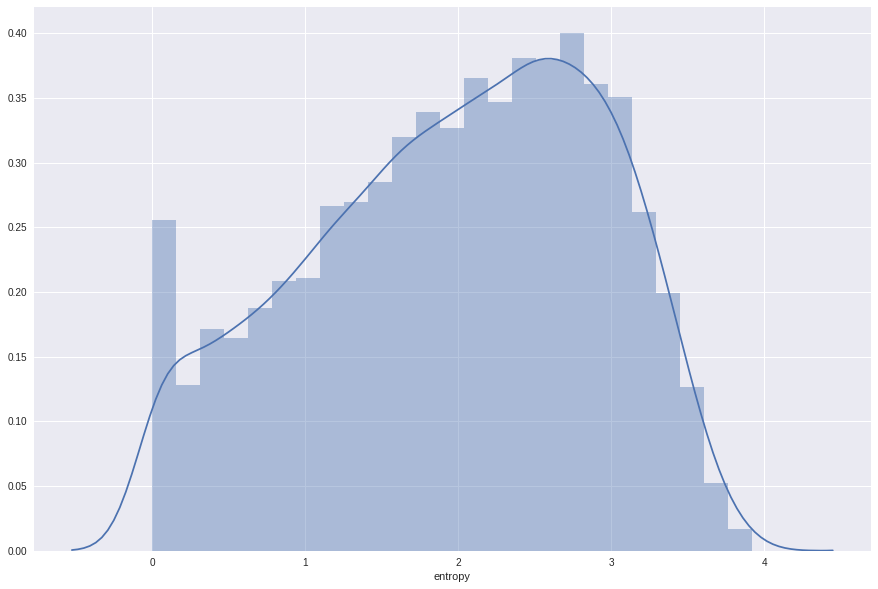

In [41]:
h5f_anime = h5py.File('gdrive/My Drive/BT4012/Week 4/dataset_anime.h5','r')
X_anime = h5f_anime['X'][:]

pics = X_anime.astype('float32') / 255.

anime_prediction = model.predict(pics)
anime_entropies = np.apply_along_axis(my_entropy, 1, anime_prediction)

df_anime_entropies = pd.DataFrame({'entropy':anime_entropies})
plt.figure(figsize=(15,10))
ax = sns.distplot(df_anime_entropies.entropy)

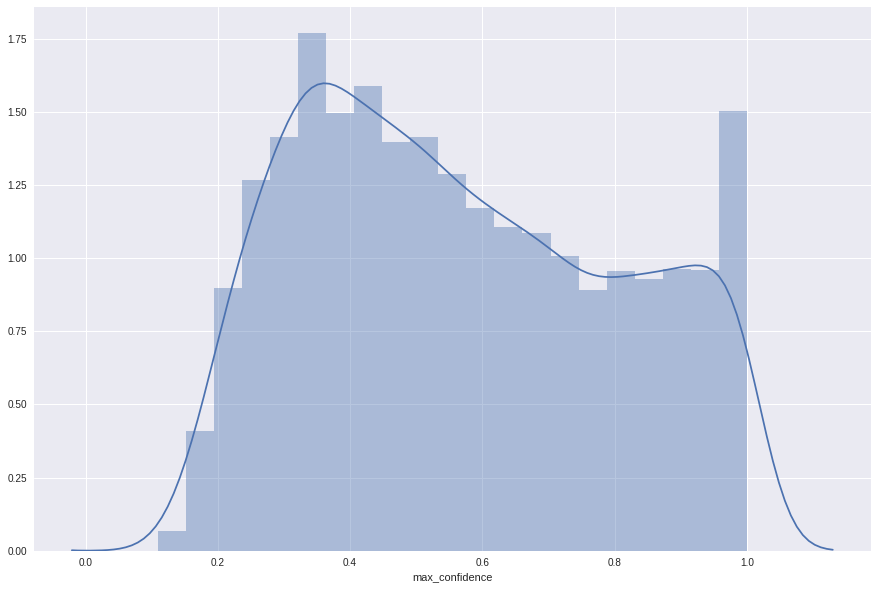

In [42]:
df_anime_confidence = pd.DataFrame({'max_confidence':np.max(anime_prediction, axis=1)})
plt.figure(figsize=(15,10))
ax = sns.distplot(df_anime_confidence.max_confidence)

## Cross Validation

In [43]:
from sklearn import linear_model, tree, model_selection

data = np.loadtxt('gdrive/My Drive/BT4012/Week 4/nonlinear.txt', delimiter = ',')
x = data[:,:2]
y = data[:,2].astype(int)

**using KFold


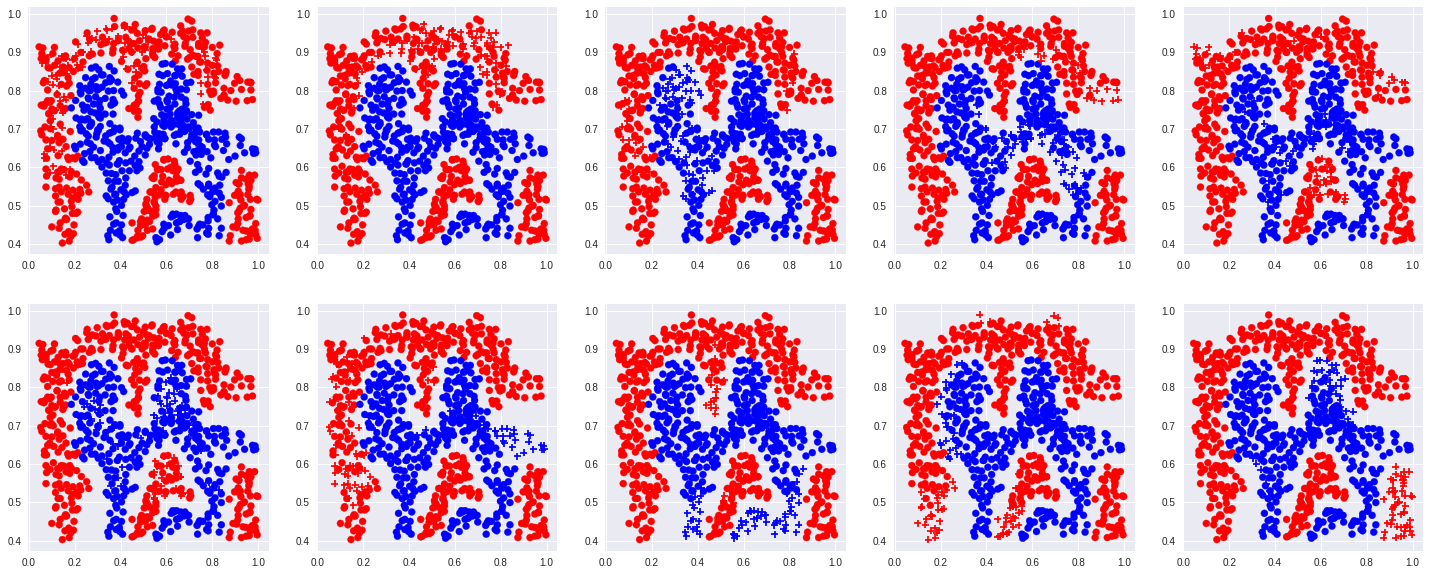

**using StratifiedKFold


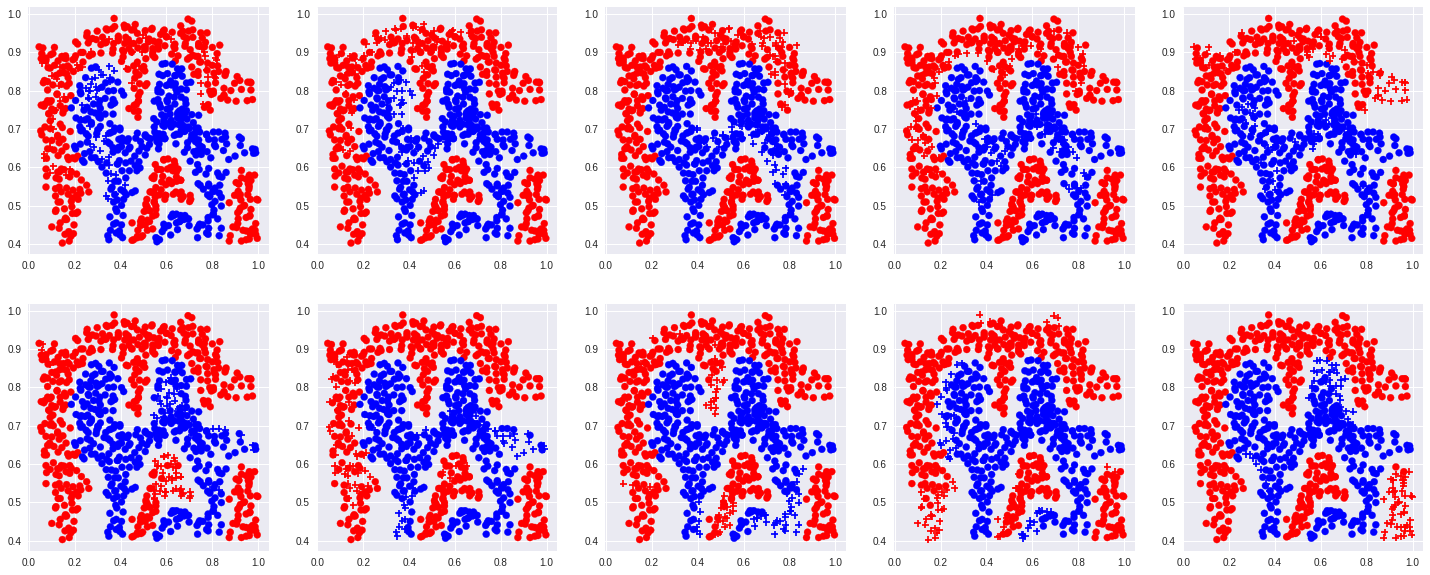

**using StratifiedKFold with shuffle


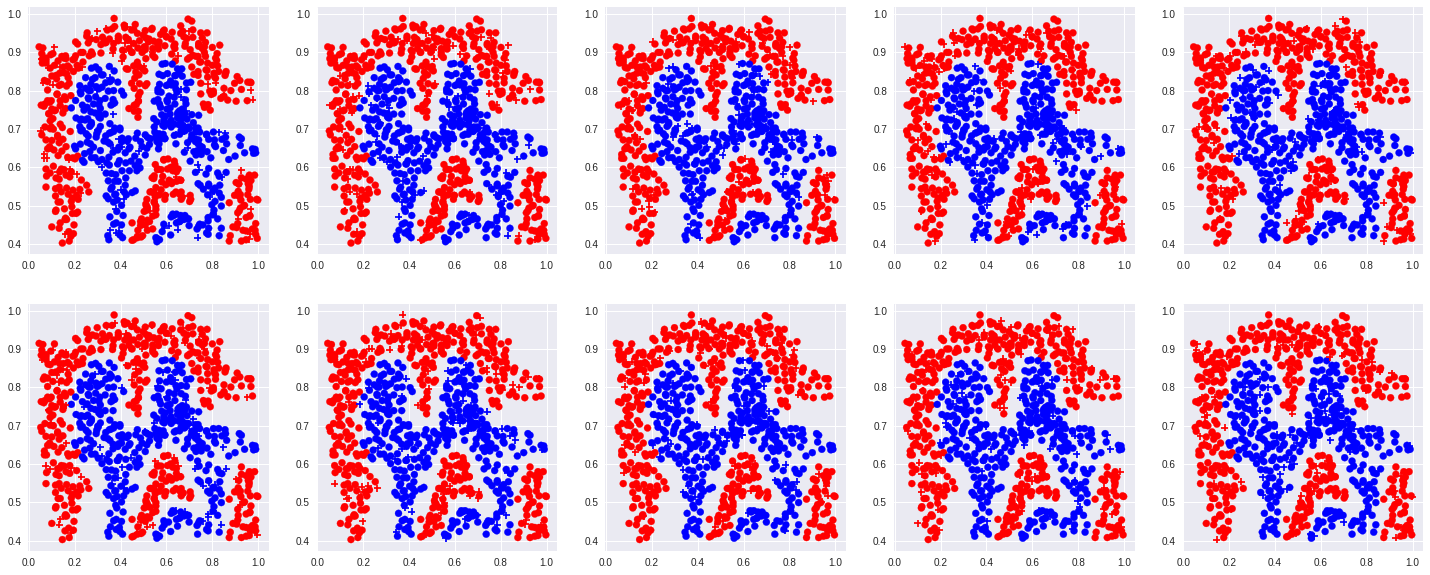

In [44]:
kf  = [
    model_selection.KFold(n_splits=10),
    model_selection.StratifiedKFold(n_splits=10),
    model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=4012)]

color = ['blue', 'red']
for i in range(3):
    print('**using ' + (i > 0 and 'Stratified' or '') + 'KFold' + (i == 2 and ' with shuffle' or ''))
    plt.figure(figsize = (25, 10))
    counter = 1
    for train_index, test_index in kf[i].split(x, y):
        plt.subplot(2, 5, counter)
        counter += 1
        x_train = x[train_index,:]
        x_test = x[test_index,:]
        y_train_color = [color[i] for i in y[train_index]]
        y_test_color = [color[i] for i in y[test_index]]
        plt.scatter(x_train[:,0], x_train[:,1], c = y_train_color)
        plt.scatter(x_test[:,0], x_test[:,1], c = y_test_color, marker = '+')
    
    plt.show()

In [45]:
clf = []
desc = []
for c in [1, 10, 100]:
    clf.append(linear_model.LogisticRegression(C = c, solver = 'liblinear'))
    desc.append('Logistic Regression with C = ' + str(c))

for d in [2, 3, 4]:
    clf.append(tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = d))
    desc.append('Decision Tree with depth = ' + str(d))

for i in range(6):
    print('------------------------')
    print(desc[i])
    print('------------------------')
    for j in range(3):
        print('**using ' + (j > 0 and 'Stratified' or '') + 'KFold' + (j == 2 and ' with shuffle' or ''))
        score = model_selection.cross_val_score(clf[i], x, y, cv = kf[j])
        pred = model_selection.cross_val_predict(clf[i], x, y, cv = kf[j])
        print('        score:', score)
        print('        mean: %.3f, standard deviation: %.3f' % (np.mean(score), np.std(score)))

------------------------
Logistic Regression with C = 1
------------------------
**using KFold
        score: [1.         0.68965517 0.2183908  0.38372093 0.40697674 0.1627907
 0.3372093  0.27906977 0.08139535 0.06976744]
        mean: 0.363, standard deviation: 0.274
**using StratifiedKFold
        score: [0.55172414 0.55172414 0.68965517 0.62790698 0.37209302 0.13953488
 0.56976744 0.77906977 0.27906977 0.06976744]
        mean: 0.463, standard deviation: 0.225
**using StratifiedKFold with shuffle
        score: [0.59770115 0.64367816 0.52873563 0.59302326 0.43023256 0.55813953
 0.52325581 0.51162791 0.58139535 0.44186047]
        mean: 0.541, standard deviation: 0.065
------------------------
Logistic Regression with C = 10
------------------------
**using KFold
        score: [0.98850575 0.71264368 0.2183908  0.40697674 0.41860465 0.12790698
 0.31395349 0.44186047 0.12790698 0.08139535]
        mean: 0.384, standard deviation: 0.271
**using StratifiedKFold
        score: [0.5517241

## Grid Search

In [46]:
def my_linspace (min_value, max_value, steps):
    diff = max_value - min_value
    return np.linspace (min_value - 0.1 * diff, max_value + 0.1 * diff, steps)

color = ['blue', 'red']
y_color = [color[i] for i in y]

parameters = [
    {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [2, 3, 4, 5], 'min_samples_split': [5]},
    {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [3], 'min_samples_split': [3, 5, 7, 9]}]

clf = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), parameters, cv = model_selection.StratifiedKFold(n_splits = 10, shuffle = True, random_state = 2019))
clf.fit(x, y)
print('best score:', clf.best_score_)
print('best parameters: ', clf.best_params_)

best score: 0.8540898155573377
best parameters:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5, 'splitter': 'best'}


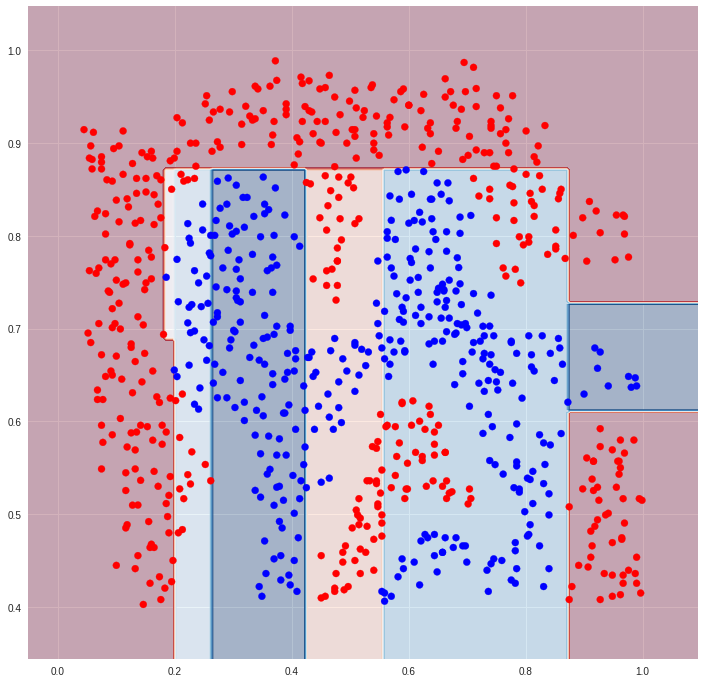

In [47]:
steps = 200
x0 = my_linspace(min(x[:,0]), max(x[:,0]), steps)
x1 = my_linspace(min(x[:,1]), max(x[:,1]), steps)
xx0, xx1 = np.meshgrid(x0, x1)
mesh_data = np.c_[xx0.ravel(), xx1.ravel()]
mesh_deci = clf.best_estimator_.predict_proba(mesh_data).reshape(steps, steps, 2)

plt.figure(figsize = (12, 12))
plt.contourf(xx0, xx1, mesh_deci[:,:,0], 40, cmap = plt.cm.RdBu, alpha = 0.3)
plt.scatter(x[:,0], x[:,1], c=y_color)
plt.show()